In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X,Y = make_circles(n_samples = 500,noise = 0.05)
print(X.shape,Y.shape)

(500, 2) (500,)


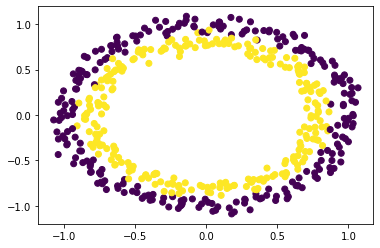

In [3]:
plt.scatter(X[:,0],X[:,1],c = Y)
plt.show()

In [4]:
def phi(X):
    '''Non linear transformation'''
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [5]:
X_ = phi(X)

(500, 3)


In [6]:
print(X_[:3,:])

[[-0.78065826  0.70067936  1.10037888]
 [ 0.67188158  0.26135573  0.51973167]
 [-0.81542752 -0.63021582  1.06209402]]


In [7]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

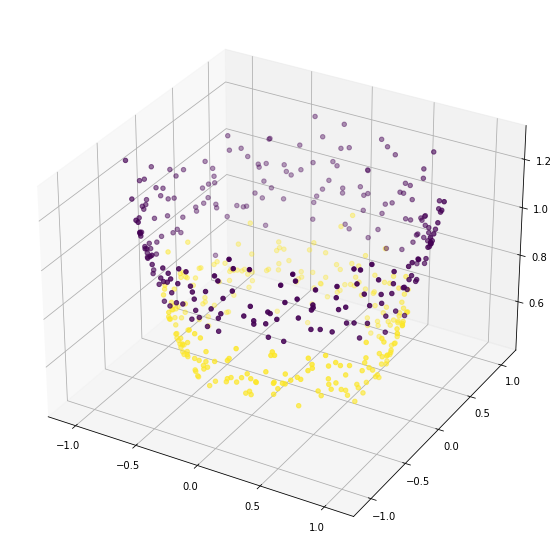

In [8]:
ax = plot3d(X_)

### Logistic Classifier

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
lr = LogisticRegression()

In [12]:
acc = cross_val_score(lr,X,Y,cv = 5).mean()
print("Accuracy of X(2D) is %.4f"%(acc*100))

Accuracy of X(2D) is 44.0000


### Logistic Classifier on Higher Dimension Space

In [13]:
acc = cross_val_score(lr,X_,Y,cv = 5).mean()
print("Accuracy of X(2D) is %.4f"%(acc*100))

Accuracy of X(2D) is 97.8000


### Visualise the Decision Surface

In [14]:
lr.fit(X_,Y)

LogisticRegression()

In [15]:
lr.coef_

array([[ 8.93205321e-04, -6.35729680e-02, -1.02091059e+01]])

In [16]:
lr.intercept_

array([8.37445053])

In [17]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [18]:
wts = lr.coef_
bias = lr.intercept_

In [19]:
z = -(wts[0,0]*xx + wts[0,1]*yy + bias)/wts[0,2]
print(z)

[[0.83257145 0.83265894 0.83274643 0.83283392]
 [0.82634436 0.82643185 0.82651934 0.82660684]
 [0.82011728 0.82020477 0.82029226 0.82037975]
 [0.81389019 0.81397768 0.81406517 0.81415267]]


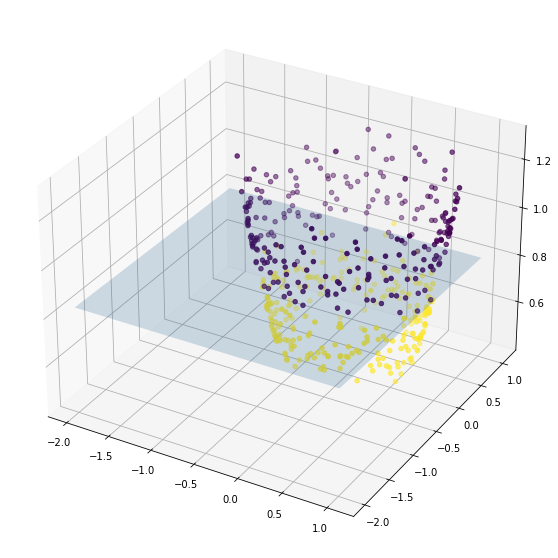

In [21]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

## Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.
- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel

**Kernel trick** is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

In [22]:
from sklearn import svm

In [24]:
svc = svm.SVC() # by default uses rbf kernel

In [26]:
svc.fit(X,Y)

SVC()

In [27]:
svc.score(X,Y)

0.98

In [28]:
svc = svm.SVC(kernel = 'poly')
svc.fit(X,Y)
svc.score(X,Y)

0.546

In [29]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

0.978